In [6]:
import eDiskplot as eplot
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, ImageNormalize
from eDisk_source_dict import source_dict
import analysis_utils as au
from qdisk.product import calculate_averaged_spectra, calculate_pvdiagram, calculate_moment, calculate_radial_profile
from qdisk.model import Keplerian_velocity
import qdisk.utils as utils
from qdisk.classes import FitsImage
%matplotlib widget
%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out"})

source = "L1489IRS"
baseline = "SBLB"
line = "12CO"
vsys = source_dict[source]["v_sys"]
center_coord = source_dict[source]["radec"]
vrange = 5
norm_kwargs = {"M0": dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
               "M1": dict(vmin=vsys-vrange, vmax=vsys+vrange),
               "M8": dict()}
moment_chunks = 4
rmax = 10
imagename = au.imageproductpath + au.get_image_basename(source, baseline, line)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
image = FitsImage(imagename)
# image.get_directional_coord(center_coord=center_coord)


[None, (10.0, -10.0), (-10.0, 10.0)]

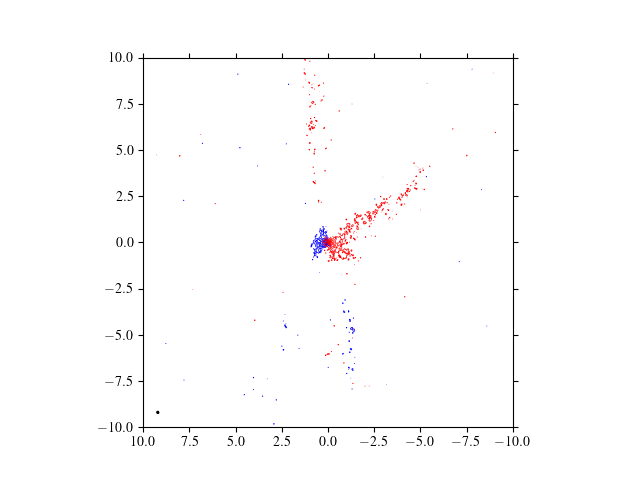

In [8]:
fig, ax = plt.subplots()

# blue
image.spectrally_collapse(vrange=(np.min(image.v), vsys), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="blue", linewidths=0.5)
)

# red
image.spectrally_collapse(vrange=(vsys, ), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

utils.plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black", fill=True, linewidths=0.5),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 10), colors="red", linewidths=0.5)
)

ax.set(aspect=1./ax.get_data_ratio(), xlim=(rmax, -rmax), ylim=(-rmax, rmax))
